In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as sc
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [60]:
data = pd.read_csv('./Road Accident/Road-Accident.csv', na_values=-1, parse_dates=['time'], infer_datetime_format=True)
# print(data.head())

In [61]:
# config datetime to ordered integers
st = pd.Timestamp(year=1900, month=1, day=1)
def convert_date(x):
    return (pd.to_datetime(x,dayfirst=True) - st).days + 2
#print((pd.to_datetime('31/12/2014',dayfirst=True) - st).days + 2)
for i, row in data.iterrows():
    if len(row['date']) == 10:
        c = convert_date(row['date'])
        data.set_value(i,'date', c)
        


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [62]:
data['date'] = data['date'].astype(np.int64)
data.index = data.date
data = data.sort_index()



In [63]:
nan_values = [[c, data[c].isnull().sum()/data.shape[0]] for c in data.columns.values]
for n in nan_values:
    if n[1] > 0.4:
        print(n)
        
# we are removing columns with str types   
data = data.select_dtypes(exclude=['O'])
        
print(data.shape)

# we are dropping columns with more than 40% missing values
for i in nan_values:
    if i[1] > 0.4:
        data.drop(i[0],axis=1, inplace=True)
print(data.shape)

# dropping rows with nan values
data = data.dropna()

print(data.shape)


orig_data = data

['driver_imd_decile', 1.0]
['vehicle_imd_decile', 1.0]
['casualty_home_area_type', 0.42200461919665233]
['casualty_imd_decile', 0.47667445878646203]
(285331, 67)
(285331, 63)
(66009, 63)


In [86]:
police_n = sorted(data.police_force.unique().tolist())
#print(police_n)

long = data.groupby(['police_force'])['longitude'].mean().values
lat = data.groupby(['police_force'])['latitude'].mean().values
#print(long)
data1 = data.copy(deep=True)


for i, row in data1.iterrows():
#     print(row['police_force'])
    if row['police_force'] != np.nan:
        ii = police_n.index(row['police_force'])
        data1.set_value(i,'longitude',long[ii])
        data1.set_value(i,'latitude',lat[ii])
    else:
        data1.set_value(i,'longitude',np.nan)
        data1.set_value(i,'latitude',np.nan)
        


50
1
1
47
47
47
47
45
45
45
45
47
47
31
31
1
1
31
55
1
50
50
62
31
62
31
20
20
31
1
23
1
43
55
62
62
55
55
47
47
47
47
47
47
47
47
55
1
47
47
47
47
31
62
62
62
62
62
62
62
62
62
4
47
4
31
31
62
31
92
1
45
45
46
46
46
31
31
46
46
31
43
46
31
31
45
45
45
4
4
12
12
12
12
45
12
12
12
12
12
12
12
12
1
46
31
6
6
6
52
41
52
52
31
46
52
52
46
45
46
31
31
31
31
31
31
31
31
31
45
31
23
23
31
31
31
1
31
31
31
97
4
20
20
20
4
31
31
31
40
40
40
20
20
31
31
97
97
1
1
1
1
60
31
4
60
60
93
93
93
97
97
60
1
20
4
42
42
4
4
42
4
4
42
42
42
42
31
31
41
50
31
31
4
4
4
4
4
4
4
4
31
42
50
42
50
50
1
1
1
1
31
31
6
30
1
1
50
50
47
47
20
30
30
31
31
31
20
97
31
31
47
31
32
30
31
47
47
47
17
17
30
31
31
61
61
31
10
31
10
10
10
31
10
1
1
6
31
31
1
1
31
31
31
61
1
31
3
3
3
31
3
3
3
31
31
31
1
3
1
45
1
31
1
31
31
13
13
13
13
31
31
31
31
31
31
1
13
97
31
35
35
31
13
13
31
31
31
31
31
31
44
13
22
22
1
97
97
97
97
16
16
54
97
35
35
35
1
54
54
1
36
54
35
22
6
31
16
95
31
95
6
96
96
96
46
46
1
31
31
13
1
32
63
63
63
21


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app



41
13
7
7
7
97
43
41
7
43
31
1
1
1
13
13
52
43
43
43
43
10
10
10
10
11
43
43
43
43
43
14
14
1
50
10
42
31
11
31
95
11
13
50
50
95
50
6
6
13
6
6
6
52
52
52
52
13
43
43
6
10
1
31
31
1
52
1
32
32
31
31
31
31
31
31
53
53
41
41
53
42
1
1
97
12
12
12
12
12
12
12
12
53
12
12
41
12
12
12
52
50
50
41
1
52
43
13
31
31
1
1
1
13
41
31
13
13
10
10
1
1
1
13
31
13
1
42
6
31
31
52
31
52
52
42
42
6
42
10
13
41
42
37
42
42
6
6
10
96
17
3
3
3
3
1
1
20
20
20
97
20
20
20
45
45
20
20
20
20
47
20
20
3
1
45
61
61
61
97
1
23
45
45
3
23
1
1
20
1
1
1
45
45
1
23
1
47
47
4
4
97
1
60
17
17
23
97
1
4
17
17
1
1
17
20
48
48
1
4
20
1
1
47
47
47
47
45
47
47
47
47
47
1
1
1
1
1
1
43
43
1
1
1
45
1
45
61
62
1
1
1
1
62
62
62
62
62
92
1
46
1
20
20
46
20
20
20
20
20
62
20
40
40
40
97
1
1
1
1
1
62
1
1
1
97
20
20
97
20
62
62
20
1
98
46
22
97
97
97
45
61
61
22
22
20
45
22
20
20
1
1
1
97
97
61
22
97
20
20
46
46
97
1
1
33
46
46
46
46
46
46
46
46
1
97
36
36
20
20
20
45
1
97
1
5
1
1
1
22
22
22
22
5
1
1
1
16
16
16
43
43
45
1
5
5
5
4


47
30
30
30
30
30
30
30
30
30
47
42
47
47
42
17
17
17
17
17
16
16
16
16
16
16
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
1
42
1
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
21
21
21
21
21
21
21
21
21
21
21
46
21
46
46
1
1
97
97
97
1
1
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
1
21
21
22
22
42
42
42
42
42
42
42
42
42
1
42
42
22
42
22
22
22
1
1
22
22
22
22
1
42
1
1
1
42
21
42
20
21
21
21
21
21
21
21
21
21
21
21
20
20
20
42
20
22
22
20
20
20
20
97
42
42
20
20
20
20
20
20
1
30
30
43
95
1
1
1
12
12
12
12
12
12
12
12
12
43
12
12
97
31
1
12
12
12
12
12
52
52
52
52
11
12
52
95
95
45
31
31
45
45
50
50
50
45
45
45
45
45
45
95
50
95
95
45
45
95
95
50
50
95
95
45
95
95
95
95
45
1
1
10
10
10
10
10
10
10
10
10
53
53
53
53
7
52
7
32
32
7
7
7
32
32
32
32
53
53
1
32
6
7
1
52
52
1
11
11
1
1
11
11
1
52
52
52
1
1
1
52
1
1
1
1
1
1
1
52
52
52
52
52
52
52
52
1
13
13
13
43
14
14
43
31
43
14
14
43
14
1
1
50
50
14
14
14
14
14
50
50
50
50
50
50
1
1
50
50
50

21
23
21
60
60
1
46
46
46
46
21
40
1
1
20
1
46
1
35
21
43
1
21
97
22
35
35
60
60
21
60
20
20
46
60
1
46
1
1
20
1
1
91
21
20
46
1
20
20
20
20
20
20
20
43
43
1
35
1
60
46
46
46
46
23
23
7
43
33
33
33
33
5
5
5
5
41
41
41
5
33
33
5
33
5
5
41
41
41
41
41
6
5
6
6
6
54
34
34
54
6
1
33
33
12
12
12
12
5
5
12
5
31
43
6
6
6
6
31
33
12
12
33
33
33
33
43
43
12
43
12
12
12
12
12
12
12
6
1
33
13
13
13
13
13
1
13
50
1
42
62
42
42
62
50
62
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
41
42
50
54
54
54
54
54
54
54
1
54
54
54
1
33
33
1
62
54
54
50
50
50
43
43
43
54
43
33
50
50
50
54
54
43
13
31
11
44
33
33
33
41
41
44
41
1
41
41
63
1
1
1
34
44
44
10
10
6
6
10
10
44
44
44
44
44
44
44
44
44
10
34
7
52
52
52
52
31
31
52
31
7
31
31
31
7
7
7
7
7
31
7
7
7
7
52
52
7
52
52
52
7
7
31
31
52
11
10
10
94
94
94
53
53
63
94
63
31
31
31
31
31
11
31
11
94
94
43
43
43
11
11
11
94
11
63
1
1
1
94
11
11
10
52
52
43
10
10
1
1
10
43
10
10
10
10
10
10
10
10
52
43
10
52
1
1
1
1
1
1
43
52
52
11
11
1
10
43
13
21
13
47
47
47

43
43
95
95
46
46
46
36
36
36
36
1
46
1
33
46
7
7
46
7
7
7
37
7
7
1
37
95
16
95
32
7
43
7
37
7
7
16
37
62
62
7
32
7
7
7
43
7
33
7
7
46
21
21
50
41
43
1
41
21
43
50
43
43
41
7
1
95
1
1
21
4
23
23
23
23
21
21
21
4
41
41
21
21
95
4
4
4
95
41
4
4
41
41
21
21
97
95
45
45
4
45
45
45
45
12
44
97
11
44
6
6
12
37
50
50
11
11
11
50
12
41
45
41
21
20
20
45
93
93
10
37
10
20
1
20
21
21
50
95
1
45
45
95
50
95
95
41
21
1
41
41
37
37
11
20
14
14
43
40
6
37
52
52
52
37
1
1
1
7
60
7
37
7
50
50
50
14
7
60
1
54
52
7
7
7
7
7
7
11
20
20
20
52
20
7
7
20
7
45
52
52
52
45
52
52
7
52
52
52
52
52
7
20
54
20
95
1
50
50
50
34
6
6
6
6
1
1
1
20
6
43
6
52
95
95
52
1
1
1
11
41
41
4
6
60
20
45
7
20
41
14
14
4
54
40
54
41
54
54
41
45
52
54
40
52
1
21
1
41
41
1
1
1
44
6
54
14
14
43
5
5
5
20
5
13
20
20
41
35
35
35
1
20
43
5
13
5
5
35
35
35
13
20
20
20
34
34
5
13
13
36
5
5
5
43
1
1
13
14
10
10
50
13
13
13
1
1
14
14
1
1
10
10
52
10
52
1
14
14
13
13
33
13
41
34
10
10
10
33
10
34
13
1
5
5
5
1
1
36
36
36
43
43
33
22
6
6
1
1
4

96
20
20
44
44
44
44
16
36
97
97
97
44
1
33
1
1
12
12
1
12
1
43
47
47
43
1
1
47
47
20
20
20
20
16
47
47
47
47
1
50
43
43
43
1
20
20
43
43
43
1
47
12
12
36
36
13
13
13
13
45
42
31
45
13
13
13
13
13
13
13
13
13
13
13
45
1
1
1
1
45
13
12
43
1
1
44
1
16
16
1
1
1
96
1
1
1
1
1
1
33
45
45
45
33
33
45
1
1
13
13
1
20
36
47
47
91
91
91
43
43
43
43
20
20
43
52
52
52
20
97
97
40
36
20
20
20
20
20
20
20
1
1
91
1
41
31
91
91
91
91
36
44
31
31
1
1
20
1
20
1
20
43
43
50
1
1
36
50
50
41
91
40
41
20
47
97
97
47
97
31
47
47
97
44
63
31
97
63
47
63
1
47
11
1
11
11
1
1
1
1
47
20
20
47
47
1
97
20
47
47
1
97
97
1
45
1
1
1
45
45
1
1
45
1
1
45
1
20
45
20
45
20
45
50
50
47
50
35
54
43
53
41
41
41
1
1
1
1
6
6
53
53
43
42
53
53
53
1
42
42
43
43
92
34
34
92
53
92
53
53
50
14
48
4
46
46
30
50
50
97
48
43
1
22
22
22
30
42
30
55
55
55
55
1
1
1
53
43
6
6
46
1
6
42
42
42
33
42
4
4
41
4
4
10
10
33
46
41
41
1
1
33
41
35
35
6
34
55
62
10
95
62
46
46
46
6
42
42
43
43
43
1
42
42
4
14
4
1
1
10
10
4
10
10
10
46
46
6
14
14
6
4

6
6
7
14
43
34
54
4
1
1
60
60
4
35
35
45
11
45
45
45
45
36
36
36
11
45
3
3
3
60
95
60
60
52
52
52
48
48
48
52
52
52
52
52
52
52
52
52
60
60
60
60
60
45
1
1
61
14
14
14
61
14
14
61
41
41
52
14
52
52
52
52
42
14
14
52
1
1
1
1
3
3
3
3
3
3
12
12
52
12
12
12
14
14
14
14
52
52
61
12
1
52
1
43
43
4
4
4
4
4
4
4
4
4
45
35
35
35
6
6
6
41
35
41
1
4
1
1
50
50
10
55
55
55
55
55
55
55
55
55
55
43
10
10
4
1
41
14
14
4
52
52
4
4
4
4
4
4
4
52
52
52
52
48
48
1
1
48
4
4
93
36
43
43
34
34
34
41
55
55
55
1
43
41
43
43
43
43
43
43
4
36
55
13
36
46
1
20
20
20
44
44
44
44
44
44
44
44
1
44
32
32
32
37
37
32
44
44
44
44
44
36
32
44
1
17
1
1
32
32
1
32
20
97
33
20
32
32
20
20
20
20
20
22
22
20
1
1
1
47
1
1
20
1
44
37
47
47
47
47
47
47
47
47
47
37
37
47
47
47
37
47
37
47
47
47
47
47
47
47
47
47
47
44
47
47
44
44
44
44
44
44
44
44
44
44
44
44
47
97
37
97
44
44
22
20
20
44
44
44
44
44
37
47
1
97
16
16
46
46
46
46
20
20
16
33
46
33
46
46
1
1
33
46
46
46
46
46
46
46
46
20
46
20
46
46
20
20
36
46
46
16
16
16
46
23
23


52
93
35
36
40
10
1
16
45
33
7
35
42
20
43
7
52
1
45
10
1
10
1
42
41
10
1
52
16
16
7
1
52
52
52
52
50
41
1
50
4
33
7
4
16
22
14
22
1
45
1
1
50
11
7
52
7
52
41
50
13
22
45
22
42
7
42
13
22
1
13
43
7
52
10
13
10
4
1
13
10
1
13
13
1
7
14
31
31
7
44
31
96
44
44
43
44
4
55
13
55
55
23
35
1
13
13
13
45
10
4
45
43
43
13
4
43
46
46
43
55
94
31
1
1
1
10
1
1
1
1
94
10
43
1
10
13
13
1
1
55
7
35
44
46
43
43
33
1
1
1
44
33
97
1
97
55
35
55
6
44
46
13
44
63
41
44
13
1
1
46
41
1
13
13
41
1
41
44
44
1
13
41
13
22
52
16
52
41
13
13
52
7
13
3
7
13
5
46
22
52
7
7
22
20
1
44
1
35
13
46
13
55
16
13
55
55
97
62
13
13
1
13
13
13
23
44
35
55
43
32
1
1
1
1
35
1
1
1
46
46
13
46
1
44
52
52
35
35
7
13
46
52
14
5
5
5
43
1
1
14
46
14
31
17
16
1
46
35
31
31
33
33
46
1
40
46
45
47
47
47
22
47
22
46
5
46
14
10
60
10
10
48
10
1
60
41
10
60
35
33
33
41
32
31
60
46
46
47
46
1
46
60
1
34
34
31
46
37
60
1
32
1
1
47
1
20
20
1
47
47
1
47
47
46
32
46
20
47
1
1
1
5
31
1
33
1
1
1
46
52
20
50
20
47
47
1
46
41
4
46
20
32
1
32
34


20
20
1
46
46
46
1
22
42
95
95
1
37
1
37
1
1
37
1
42
46
46
46
97
42
42
42
97
97
42
95
12
12
95
14
12
12
12
1
42
1
92
1
1
43
43
43
43
43
44
31
44
43
43
43
1
44
14
20
44
44
44
20
20
42
42
52
4
98
44
20
14
1
1
1
92
1
1
5
5
92
5
5
5
44
44
5
5
46
44
16
16
5
5
5
5
5
5
5
14
46
43
1
20
17
4
20
20
20
52
52
52
44
44
20
1
1
1
6
33
63
17
62
62
1
46
16
20
36
35
35
35
35
1
1
35
20
1
35
1
44
44
17
1
36
36
16
62
4
20
20
33
1
13
13
13
13
97
13
13
13
13
97
1
1
1
55
1
1
55
1
1
97
97
44
44
34
13
1
20
34
52
52
52
52
52
96
52
16
52
36
52
41
41
13
13
13
13
13
13
5
16
6
45
97
43
43
1
1
1
1
95
97
1
31
46
36
36
1
1
1
44
44
20
20
95
95
95
1
95
95
10
1
36
95
95
95
1
95
20
95
95
20
33
46
46
1
10
20
20
44
52
52
44
46
1
36
44
43
6
1
62
1
62
1
1
31
1
1
44
13
10
31
31
36
31
10
10
6
41
41
43
20
6
34
14
20
14
14
1
43
17
6
14
91
1
7
20
20
43
43
7
7
1
43
43
34
17
7
7
14
95
43
7
7
7
1
43
95
1
7
7
7
14
1
22
14
98
6
10
10
10
5
21
98
21
21
21
21
48
55
43
55
21
55
6
6
22
22
98
1
50
22
10
22
10
22
22
22
22
98
98
22
50
48
98
1
6

1
10
22
22
22
22
97
41
20
60
60
44
14
60
42
60
47
45
4
4
41
1
41
4
4
47
45
6
6
6
6
1
1
4
20
60
43
52
14
52
20
12
1
12
1
12
1
52
1
12
12
1
12
1
1
1
14
20
1
12
92
43
45
31
63
45
60
63
36
36
36
36
36
14
63
36
20
41
20
60
1
1
31
1
1
63
1
60
60
1
16
1
60
60
60
50
44
63
50
14
1
60
60
63
60
14
60
1
1
14
14
17
44
20
94
44
52
1
50
35
94
20
44
94
22
13
13
94
94
52
63
17
46
1
63
46
52
40
20
52
45
32
62
92
40
46
52
47
94
44
1
1
1
1
52
63
1
1
1
1
44
46
1
47
44
62
62
50
42
1
44
16
16
62
94
94
1
94
1
46
32
1
1
35
3
3
63
43
3
3
43
3
43
3
6
1
6
32
3
30
1
46
35
1
32
32
1
1
62
1
1
40
20
52
13
45
17
1
62
46
63
62
52
20
3
44
13
44
47
47
1
30
91
1
44
50
1
44
91
97
44
13
44
44
44
13
20
4
16
1
10
4
47
20
44
1
50
50
50
13
36
13
44
36
10
44
1
1
16
1
1
20
20
1
16
36
44
44
47
1
13
16
20
52
34
1
20
52
33
45
1
52
34
34
1
1
1
1
34
97
16
1
1
52
35
52
35
60
60
35
60
97
13
60
60
32
13
45
52
97
52
52
95
1
42
1
1
1
20
20
13
16
13
33
13
33
33
13
20
97
20
47
13
1
42
1
42
47
42
36
42
36
36
1
1
1
1
1
1
14
36
35
1
1
20
1
1
44

43
46
5
7
43
43
43
43
7
7
7
7
7
7
7
42
4
4
41
5
5
5
20
20
5
5
5
5
5
43
43
43
44
34
44
44
44
44
55
55
55
55
55
55
55
55
55
36
36
36
22
22
40
95
44
95
36
44
36
44
44
55
55
10
10
1
41
41
55
55
55
55
55
34
1
34
44
44
95
44
4
4
4
4
44
44
44
1
36
95
50
43
44
44
42
44
44
42
42
44
97
44
44
42
97
20
44
20
20
44
17
42
17
17
20
42
95
42
50
95
22
22
22
22
95
6
6
95
95
95
95
44
44
95
42
42
44
44
44
41
41
50
44
44
42
1
10
10
1
42
42
42
55
55
55
10
10
10
10
42
1
1
43
22
1
1
1
42
10
44
43
22
10
1
1
42
42
4
1
52
52
52
20
42
42
52
52
52
33
97
22
22
52
52
52
52
22
16
16
16
16
52
42
1
16
43
4
10
4
4
4
4
4
10
10
10
10
10
1
1
10
10
10
10
10
10
55
55
55
55
55
4
55
16
95
16
10
95
10
1
16
1
10
10
1
1
1
7
16
10
10
95
95
10
10
10
10
10
10
95
95
16
7
20
20
13
13
21
21
34
33
33
33
33
33
33
35
33
36
43
43
43
34
53
53
53
21
33
97
33
1
1
13
35
35
13
13
13
1
13
13
13
43
13
43
13
33
47
47
33
47
1
1
47
97
1
13
33
33
33
33
21
36
47
47
36
47
47
47
47
36
47
47
47
23
23
36
47
1
1
61
21
33
21
33
20
33
21
21
1
1
1
1
96
96
50


31
35
20
62
20
20
20
4
20
20
20
20
4
20
4
37
4
4
37
23
37
37
62
4
37
23
20
63
41
12
43
43
50
40
50
37
37
12
14
1
43
43
1
1
23
23
45
41
14
20
34
12
31
35
63
36
36
45
45
31
31
34
31
12
12
41
12
12
12
12
36
12
31
54
42
1
1
1
1
1
1
1
1
43
1
97
1
43
1
1
6
1
1
6
97
1
91
97
1
1
1
1
1
95
1
1
1
95
96
96
95
43
1
1
97
1
97
1
1
1
1
1
1
1
1
1
1
1
95
1
1
1
1
1
1
97
1
1
1
1
97
97
97
97
97
48
97
43
6
1
6
48
94
97
1
97
1
1
1
1
6
1
1
1
48
1
1
1
97
1
1
1
91
91
97
1
1
1
1
43
43
43
91
1
1
92
1
1
1
1
1
1
1
1
1
43
43
6
6
43
43
6
6
1
1
1
1
1
1
97
1
92
97
1
1
97
1
1
1
1
43
1
91
1
1
1
1
97
1
1
96
1
96
96
96
1
96
96
96
96
95
96
1
95
91
1
1
20
43
40
43
43
43
43
43
1
1
1
43
43
43
52
43
43
43
43
20
1
1
43
1
3
52
22
43
43
50
43
43
20
50
50
1
40
33
33
43
43
42
43
17
11
40
43
43
43
40
43
43
17
40
22
40
43
97
43
52
43
6
1
21
1
44
43
52
44
97
97
3
3
3
3
44
43
44
1
52
14
52
44
44
50
53
53
52
14
44
44
44
43
50
1
14
1
1
3
43
43
44
53
43
43
43
33
43
22
22
22
22
40
98
43
43
43
44
3
4
44
97
97
44
44
40
44
44
3
43
43
91
91
44


61
54
54
32
10
62
32
46
46
21
54
1
54
1
1
32
44
44
1
32
54
46
1
54
54
32
1
1
45
4
45
1
1
1
1
21
54
46
54
92
4
47
54
44
32
44
1
32
50
54
41
1
44
32
32
54
32
1
47
54
47
34
35
47
1
1
1
33
42
1
50
1
47
42
93
43
35
1
1
97
14
1
35
50
6
6
52
97
93
93
1
1
52
21
1
10
10
93
97
97
34
35
35
1
21
12
93
43
12
12
43
6
1
14
43
43
1
52
14
12
14
12
12
12
12
12
6
52
4
12
12
1
14
16
43
43
43
43
35
35
16
16
16
12
22
97
12
22
22
14
12
16
12
12
4
43
16
12
4
14
97
31
14
1
1
97
97
32
62
62
14
14
23
23
43
1
14
1
32
4
52
1
1
1
32
1
1
50
50
1
22
22
1
14
7
7
31
45
50
45
6
4
4
50
50
31
45
4
45
45
45
52
45
7
7
7
7
7
7
22
7
31
1
33
31
45
52
32
42
43
14
60
1
1
20
1
1
1
97
23
1
1
1
1
97
14
4
43
42
1
43
43
31
31
1
43
1
42
42
34
31
4
41
14
14
1
1
52
1
43
43
43
43
1
14
14
1
60
60
1
1
60
14
1
97
20
1
1
1
20
43
97
14
14
63
14
43
42
1
52
44
4
1
44
44
44
41
13
33
41
41
13
6
6
41
42
20
1
1
20
20
11
13
11
21
11
50
41
42
44
44
4
4
1
97
44
44
33
33
4
4
13
1
4
4
4
42
11
33
34
33
43
43
43
33
63
47
63
63
33
42
42
43
4
4
50
33
13
13


55
20
20
20
20
20
63
20
20
4
5
20
55
21
41
97
41
4
55
55
4
33
97
6
6
6
6
6
55
55
1
1
6
1
45
45
20
43
20
20
20
1
20
20
36
45
1
1
21
1
1
33
1
41
94
94
1
45
45
41
20
33
54
33
45
33
1
4
1
21
7
7
4
6
4
4
20
45
20
6
21
7
97
43
20
4
7
45
4
4
7
7
7
7
7
7
45
7
7
4
45
21
20
54
1
20
43
54
1
14
42
14
14
1
14
14
36
43
14
4
20
14
4
36
20
35
20
43
43
42
1
60
3
60
53
97
60
60
53
3
60
52
52
16
3
1
1
16
23
3
20
41
41
43
3
20
14
14
46
1
14
14
46
41
3
41
3
41
63
14
3
1
1
14
60
1
1
42
1
43
1
1
1
46
1
43
46
46
63
1
1
46
46
42
43
43
1
1
1
1
1
1
1
45
20
20
20
45
20
20
1
52
6
6
52
52
20
20
1
46
52
52
1
52
97
46
95
95
46
1
1
6
6
6
41
41
41
41
50
41
46
46
37
36
36
32
32
32
46
4
42
20
95
37
1
1
46
1
1
1
1
16
1
1
1
1
1
95
1
95
16
20
20
20
1
1
45
12
21
21
46
54
21
21
21
21
21
20
1
54
93
54
54
54
54
1
1
54
1
20
20
54
1
1
1
97
43
43
36
43
36
97
97
50
54
1
54
46
46
50
1
1
54
95
95
1
1
6
1
95
95
12
12
12
1
1
91
1
12
12
52
52
12
12
12
12
12
1
42
12
95
1
1
45
45
17
45
17
95
52
52
21
45
45
20
20
45
45
45
45
6
1
1
1
1
46
3

1
1
1
5
45
5
5
1
1
1
1
1
44
5
44
45
45
5
44
44
44
44
44
44
44
44
44
45
45
45
42
20
20
44
43
35
32
50
1
6
32
32
1
32
97
1
97
21
41
23
23
23
20
20
52
1
42
1
52
52
43
43
47
47
1
42
43
1
1
1
6
20
20
4
1
52
1
47
46
97
17
17
17
14
93
46
14
40
1
1
1
1
42
42
40
41
97
5
1
1
20
20
47
20
4
5
4
4
43
50
41
41
42
42
43
52
47
1
32
32
43
43
43
91
91
32
32
34
34
32
34
34
34
34
32
34
47
47
50
47
47
1
1
32
47
47
35
35
91
91
50
50
1
47
1
34
34
34
17
47
4
42
1
4
4
41
4
4
1
42
4
42
42
42
4
17
41
41
34
46
47
43
47
35
42
43
43
43
6
6
52
52
41
17
17
32
21
4
21
45
30
33
45
33
1
54
6
54
10
21
54
6
10
54
62
1
1
54
54
23
23
23
23
23
45
45
1
33
30
1
1
45
33
30
30
1
1
4
1
1
54
45
33
45
45
45
45
45
45
45
45
6
1
30
1
54
1
45
20
12
1
1
1
1
12
10
55
42
12
10
55
12
1
10
20
1
63
63
10
63
1
97
12
20
1
30
55
55
45
45
45
33
33
36
55
36
1
4
1
1
55
4
1
20
1
1
1
6
31
31
55
55
55
20
1
10
10
4
43
10
16
10
1
1
14
43
14
7
7
14
62
14
50
50
7
7
62
10
41
41
7
10
1
1
7
14
62
62
1
1
1
1
10
62
10
1
1
6
6
62
62
7
1
1
1
1
62
1
1
1
62
97
97

13
13
1
1
55
55
43
54
13
13
13
13
13
13
55
55
55
55
1
1
20
1
1
13
13
13
37
13
13
13
13
13
13
13
97
13
13
1
1
54
13
13
54
54
13
13
97
13
13
13
13
54
37
34
13
97
36
36
36
23
23
97
97
4
4
23
97
14
14
14
11
11
6
14
97
21
43
21
44
44
44
44
44
44
14
36
33
33
21
1
1
1
36
95
36
43
43
42
95
95
95
95
95
44
95
22
95
95
95
95
95
62
62
42
36
11
11
36
36
22
34
97
14
1
63
50
1
1
1
50
1
4
44
44
50
4
14
20
20
16
1
11
11
11
11
11
6
6
6
50
50
50
1
1
44
1
44
44
11
36
36
11
36
14
1
1
42
42
1
44
97
44
42
44
44
44
44
44
44
31
31
31
44
44
44
44
42
20
20
33
45
45
45
43
45
45
45
45
35
35
45
35
97
20
97
20
20
20
20
20
1
45
6
6
1
1
46
50
45
20
45
45
40
3
3
3
3
3
3
3
7
7
7
7
7
7
23
23
5
5
1
1
5
5
5
6
97
93
45
45
45
6
6
6
6
46
20
62
62
20
20
20
23
23
1
46
46
1
97
62
1
62
4
4
4
1
1
1
1
33
1
1
33
48
46
40
16
43
45
45
40
40
40
40
50
46
62
62
62
62
46
46
46
46
46
46
46
1
46
62
62
46
46
62
40
40
43
16
20
1
1
12
12
45
45
45
43
6
97
6
6
6
6
6
12
52
45
6
6
23
23
6
6
6
6
32
40
32
20
1
12
12
12
92
33
20
1
1
1
1
98
20
6
20
20

95
95
95
1
30
30
1
41
97
1
47
50
50
54
4
30
1
30
30
30
30
30
30
30
30
30
23
30
30
30
30
23
95
23
97
34
63
63
95
50
23
4
1
33
4
54
54
42
54
54
54
54
4
20
20
4
46
46
46
1
20
23
23
23
1
46
97
97
33
94
46
95
91
46
1
1
36
36
44
36
36
36
47
47
1
46
1
47
47
47
1
1
44
1
44
1
1
1
36
47
36
1
91
47
1
1
1
1
1
1
47
46
32
32
32
1
32
46
1
1
1
1
1
23
23
1
1
46
46
53
36
36
50
41
50
50
50
20
20
41
41
47
44
44
44
41
47
47
50
50
47
47
47
47
47
47
50
50
50
50
50
1
1
1
43
37
50
50
1
95
50
50
95
44
44
37
1
1
1
1
50
50
1
44
44
37
1
44
41
50
1
55
1
23
1
23
23
55
23
1
50
1
23
23
23
46
46
23
14
14
46
1
14
14
36
23
23
36
95
1
46
46
95
95
5
1
1
1
23
46
95
55
55
23
46
98
6
44
44
46
98
46
50
45
6
43
43
1
46
33
33
45
1
45
45
45
45
33
33
97
97
45
45
45
1
96
96
97
97
21
22
21
21
1
1
97
63
33
34
1
50
1
1
1
34
63
43
43
33
45
97
44
45
20
20
20
20
45
31
31
44
1
44
1
97
97
44
63
46
63
63
1
46
34
44
44
20
20
37
46
46
1
46
1
1
4
4
46
46
45
37
33
60
60
46
46
46
45
33
7
44
43
7
44
44
1
1
1
50
1
1
44
44
32
43
1
1
1
1
1
32
33
33


11
11
46
46
46
4
1
20
11
50
50
1
11
50
1
1
1
11
11
11
11
47
62
47
1
1
1
1
52
52
52
20
52
20
20
20
20
33
1
52
52
52
6
53
53
43
1
1
1
53
97
20
33
21
95
20
20
42
62
62
42
20
47
10
10
10
20
20
20
95
95
95
30
1
20
20
20
20
20
20
30
20
14
42
42
20
42
20
43
1
20
20
13
13
1
20
20
20
4
4
16
16
16
16
16
4
6
1
6
46
1
98
10
10
21
97
21
60
30
30
13
13
13
13
20
20
20
43
1
43
43
43
4
1
4
4
4
30
20
4
42
1
20
30
30
42
41
41
41
42
20
60
20
20
30
55
10
4
47
55
47
47
20
20
20
20
14
47
1
47
60
47
1
14
4
16
55
16
1
1
42
42
7
22
47
7
96
47
48
47
1
47
48
48
22
1
47
47
47
48
47
1
1
47
48
1
41
47
47
60
96
47
62
47
47
7
43
7
7
1
62
1
22
41
55
62
1
62
20
43
43
55
55
62
20
20
16
7
1
7
14
16
55
7
7
14
7
41
55
7
14
96
55
41
7
41
7
14
14
16
60
1
45
33
33
33
60
45
60
33
43
60
33
1
33
45
45
45
45
1
33
1
1
1
60
45
42
1
33
42
42
60
1
1
45
45
33
33
33
1
1
45
1
33
33
1
45
1
1
60
1
60
44
1
54
54
22
22
1
1
21
53
54
53
1
21
21
42
42
42
21
21
53
20
20
54
6
6
20
20
20
20
55
55
36
36
36
20
20
42
54
54
54
54
54
21
6
21
44
32
44
3

42
4
5
44
60
43
1
60
1
46
44
98
98
44
32
1
1
1
60
60
60
4
63
44
63
63
5
1
1
60
1
63
63
63
60
1
1
42
42
42
44
60
47
47
47
43
33
60
1
1
1
47
1
1
43
22
16
22
7
96
12
7
7
43
44
44
32
42
7
7
7
7
7
7
32
3
7
32
3
4
32
10
46
14
50
4
46
7
7
50
32
22
22
7
14
7
42
7
7
14
1
1
1
12
12
12
12
12
14
32
14
14
14
32
14
14
50
14
50
7
7
20
10
20
32
12
7
14
50
50
14
1
14
14
50
32
20
14
42
1
5
35
35
1
1
1
1
35
5
35
1
35
35
53
35
35
1
53
1
14
6
14
5
5
5
47
42
5
42
5
14
35
5
35
1
35
35
35
35
42
1
1
1
42
1
20
42
1
46
14
4
1
47
6
40
63
10
14
13
14
1
1
1
13
21
55
40
20
60
40
55
46
46
31
44
32
20
46
46
20
45
1
45
10
45
45
40
45
60
32
46
96
63
50
45
40
40
50
63
46
11
63
50
14
60
6
42
53
6
21
13
50
1
36
1
46
1
50
36
47
47
13
1
36
97
96
13
1
13
47
47
96
20
13
21
6
6
43
4
4
4
4
52
4
36
4
52
55
63
6
63
14
55
44
13
36
31
13
14
63
6
14
6
52
43
20
20
14
14
17
6
21
6
5
10
5
5
14
14
14
5
95
34
1
14
20
21
61
61
46
12
12
10
5
4
4
46
12
34
10
46
20
10
52
21
53
1
1
53
5
5
1
11
4
11
1
1
1
1
1
1
5
5
5
52
6
5
97
6
43
43
54
22
5
5

KeyboardInterrupt: 

In [70]:
m1 = convert_date('01/01/2015')
m2 = convert_date('01/02/2015')
m3 = convert_date('01/03/2015')
m4 = convert_date('01/04/2015')
m5 = convert_date('01/05/2015')
m6 = convert_date('01/06/2015')
m7 = convert_date('01/07/2015')
m8 = convert_date('01/08/2015')
m9 = convert_date('01/09/2015')
m10 = convert_date('01/10/2015')
m11 = convert_date('01/11/2015')
m12 = convert_date('01/12/2015')
m13 = convert_date('01/01/2016')

In [81]:
data = pd.read_csv('./Road Accident/Road-Accident.csv', na_values=-1, parse_dates=['time'], infer_datetime_format=True)
# config datetime to ordered integers
st = pd.Timestamp(year=1900, month=1, day=1)
def convert_date(x):
    return (pd.to_datetime(x,dayfirst=True) - st).days + 2
#print((pd.to_datetime('31/12/2014',dayfirst=True) - st).days + 2)
for i, row in data.iterrows():
    if len(row['date']) == 10:
        c = convert_date(row['date'])
        data.set_value(i,'date', c)
    
data['date'] = data['date'].astype(np.int64)
data.index = data.date
data = data.sort_index()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


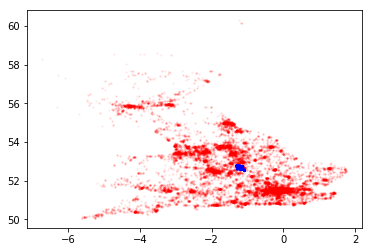

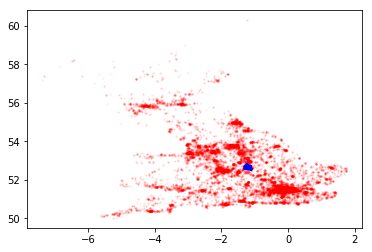

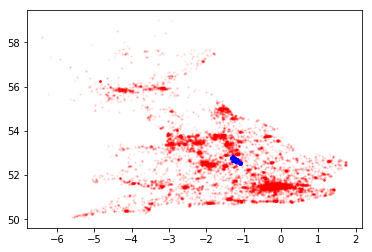

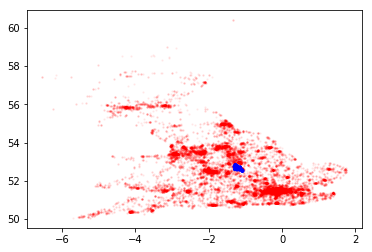

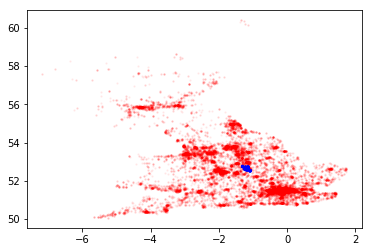

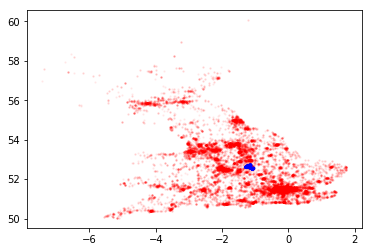

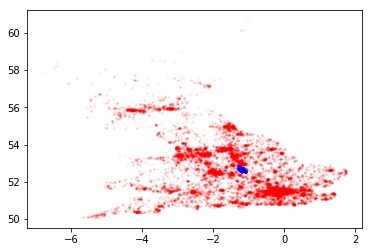

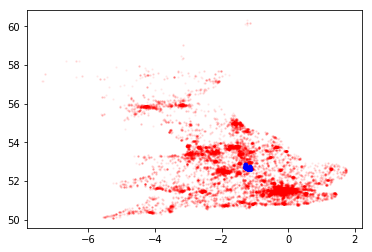

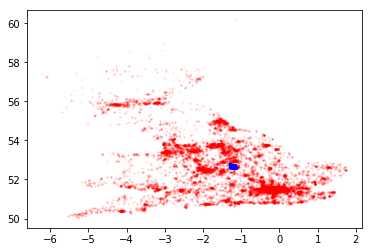

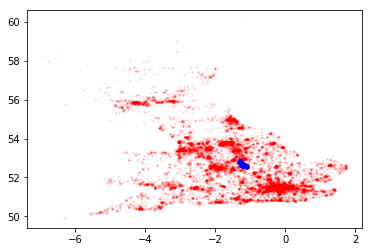

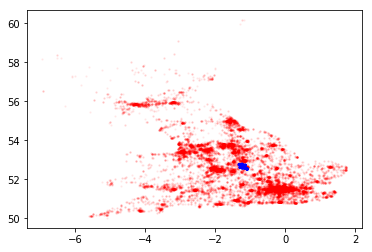

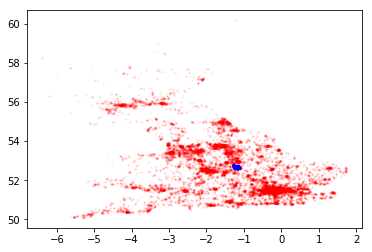

In [84]:
m = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13]
for i in range(12):
    a = (data1[data1['date'].between(m[i], m[i+1])])
    b = (data[data['date'].between(m[i], m[i+1])])
    counts = pd.crosstab(a.longitude, a.latitude).stack().reset_index(name='freq')
    plt.scatter(b.longitude,b.latitude,s=2,c='r',marker='o',alpha=0.05)
    plt.scatter(a.longitude,a.latitude,s=counts['freq']/90,c='b',marker='o',alpha=1)
    plt.show()

In [44]:
# from numpy import mean
# from numpy import std
# from numpy import dstack
# from pandas import read_csv
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.utils import to_categorical
# from matplotlib import pyplot
 
# # load a single file as a numpy array
# def load_file(filepath):
# 	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
# 	return dataframe.values
 
# # load a list of files and return as a 3d numpy array
# def load_group(filenames, prefix=''):
# 	loaded = list()
# 	for name in filenames:
# 		data = load_file(prefix + name)
# 		loaded.append(data)
# 	# stack group so that features are the 3rd dimension
# 	loaded = dstack(loaded)
# 	return loaded
 
# # load a dataset group, such as train or test
# def load_dataset_group(group, prefix=''):
# 	filepath = prefix + group + '/Inertial Signals/'
# 	# load all 9 files as a single array
# 	filenames = list()
# 	# total acceleration
# 	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
# 	# body acceleration
# 	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
# 	# body gyroscope
# 	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
# 	# load input data
# 	X = load_group(filenames, filepath)
# 	# load class output
# 	y = load_file(prefix + group + '/y_'+group+'.txt')
# 	return X, y
 
# # load the dataset, returns train and test X and y elements
# def load_dataset(prefix=''):
# 	# load all train
# 	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
# 	print(trainX.shape, trainy.shape)
# 	# load all test
# 	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
# 	print(testX.shape, testy.shape)
# 	# zero-offset class values
# 	trainy = trainy - 1
# 	testy = testy - 1
# 	# one hot encode y
# 	trainy = to_categorical(trainy)
# 	testy = to_categorical(testy)
# 	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
# 	return trainX, trainy, testX, testy
 
# # fit and evaluate a model
# def evaluate_model(trainX, trainy, testX, testy):
# 	# define model
# 	verbose, epochs, batch_size = 0, 25, 64
# 	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
# 	# reshape data into time steps of sub-sequences
# 	n_steps, n_length = 4, 32
# 	trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
# 	testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
# 	# define model
# 	model = Sequential()
# 	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
# 	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
# 	model.add(TimeDistributed(Dropout(0.5)))
# 	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
# 	model.add(TimeDistributed(Flatten()))
# 	model.add(LSTM(100))
# 	model.add(Dropout(0.5))
# 	model.add(Dense(100, activation='relu'))
# 	model.add(Dense(n_outputs, activation='softmax'))
# 	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	# fit network
# 	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# 	# evaluate model
# 	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
# 	return accuracy
 
# # summarize scores
# def summarize_results(scores):
#     print(scores)
#     m, s = mean(scores), std(scores)
#     print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# # run an experiment
# def run_experiment(repeats=10):
#     # load data
#     trainX, trainy, testX, testy = load_dataset()
#     # repeat experiment
#     scores = list()
#     for r in range(repeats):
#         score = evaluate_model(trainX, trainy, testX, testy)
#         score = score * 100.0
#         print('>#%d: %.3f' % (r+1, score))
#         scores.append(score)
#     # summarize results
#     summarize_results(scores)
 
# # run the experiment
# run_experiment()

In [45]:
# # using timeseries classification using rnn

# import tensorflow as tf
# from scipy import stats
# from tensorflow.python.ops import rnn, rnn_cell
# from sklearn.metrics import roc_auc_score

In [46]:
# def windows(data, window_size):
#     start = 0
#     while start < len(data):
#         yield start, start + window_size
#         start += (window_size / 2)
        
# def extract_segments(data, window_size = 30):
#     segments = np.empty((0,(window_size + 1)))
#     labels = np.empty((0))
#     for (start,end) in windows(data,window_size):
#         if(len(data.ix[start:end]) == (window_size + 1)):
#             signal = data.ix[start:end]["<FEATURE COLUMN NAME>"]
#             segments = np.vstack([segments, signal])
#             labels = np.append(labels,stats.mode(data.ix[start:end]["<CLASS COLUMN NAME>"])[0][0])
#     return segments, labels

In [47]:
# win_size = 10
# '''
# MIMIC-III dataset can possibly be use to train and test the model. 
# But beware this is not the data set used by the authors of the paper. 
# For dataset description and format please see Section 3: Data Description in the paper.
# '''

# segments,labels = extract_segments(data, win_size)
# labels = np.asarray(pd.get_dummies(labels), dtype = np.int8)
# reshaped_segments = segments.reshape([len(segments),(win_size + 1),1])

In [48]:
# train_test_split = np.random.rand(len(reshaped_segments)) < 0.80
# train_x = reshaped_segments[train_test_split]
# train_y = labels[train_test_split]
# test_x = reshaped_segments[~train_test_split]
# test_y = labels[~train_test_split]


In [49]:
# # Hyperparameter configuration

# tf.reset_default_graph()

# learning_rate = 0.001
# training_epochs = 100
# batch_size = 10
# total_batches = (train_x.shape[0]//batch_size)

# n_input = 1
# n_steps = 10
# n_hidden = 64
# n_classes = 3

# alpha = 0.5

In [50]:
# # Input/output placeholders for TensorFlow graph

# x = tf.placeholder("float", [None, n_steps, n_input])
# y = tf.placeholder("float", [None, n_classes])
# y_steps = tf.placeholder("float", [None, n_classes])

In [51]:
# # Helper methods
# # Addition of Dropout and/or other modification to model architecture can be made in LSTM function.

# def weight_variable(shape):
#     initial = tf.truncated_normal(shape, stddev = 0.1)
#     return tf.Variable(initial)

# def bias_variable(shape):
#     initial = tf.constant(0.0, shape = shape)
#     return tf.Variable(initial)

# def LSTM(x, weight, bias):
#     cell = rnn_cell.LSTMCell(n_hidden,state_is_tuple = True)
#     multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell([cell] * 2)
#     output, state = tf.nn.dynamic_rnn(multi_layer_cell, x, dtype = tf.float32)
#     output_flattened = tf.reshape(output, [-1, n_hidden])
#     output_logits = tf.add(tf.matmul(output_flattened,weight),bias)
#     output_all = tf.nn.sigmoid(output_logits)
#     output_reshaped = tf.reshape(output_all,[-1,n_steps,n_classes])
#     output_last = tf.gather(tf.transpose(output_reshaped,[1,0,2]), n_steps - 1)  
#     #output = tf.transpose(output, [1, 0, 2])
#     #last = tf.gather(output, int(output.get_shape()[0]) - 1)
#     #output_last = tf.nn.sigmoid(tf.matmul(last, weight) + bias)
#     return output_last, output_all


# def RNN(x, weights, biases):
#     # reshape to [1, n_input]
#     x = tf.reshape(x, [-1, n_input])

#     # Generate a n_input-element sequence of inputs
#     # (eg. [had] [a] [general] -> [20] [6] [33])
#     x = tf.split(x,n_input,1)

#     # 1-layer LSTM with n_hidden units.
#     cell = rnn_cell.BasicLSTMCell(n_hidden)

#     # generate prediction
#     outputs, states = rnn_cell.static_rnn(cell, x, dtype=tf.float32)

#     # there are n_input outputs but
#     # we only want the last output
#     return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [52]:
# weight = weight_variable([n_hidden,n_classes])
# bias = bias_variable([n_classes])
# print(x.shape)
# print(weight.shape)
# print(bias.shape)
# # y_last, y_all = LSTM(x,weight,bias)
# y_last = RNN(x,weight,bias)
